In [27]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from ast import literal_eval

# For saving as plotly:
import plotly.io as plotly
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

plotly_folder = '../static/plotly/'

In [2]:
song_data = pd.read_pickle('songData.df')
song_data.head()

,released,artists,lyrics,genres,title
0,1957,[marty robbins],\nOut in the West Texas town of El Paso\nI fel...,[country],El Paso
1,1960-01-04,[frankie avalon],I'll never let you go\nWhy? Because I love you...,[pop],Why
3,1959,[johnny preston],"On the bank of the river\nStood Running Bear, ...",[pop],Running Bear
4,1960-01-04,[freddy cannon],"Well, way down yonder in New Orleans\nIn the l...",[pop],Way Down Yonder in New Orleans
5,1960-01-04,[guy mitchell],"\nHeartaches by the number, troubles by the sc...","[country, cover]",Heartaches by the Number


In [3]:
artist_count = defaultdict(lambda: 0)
artist_colab_count = defaultdict(lambda: defaultdict(lambda: 0))

for artists in song_data.artists:
    for artist in artists:
        artist_count[artist] += 1
        for colab in artists:
            if colab != artist:
                artist_colab_count[artist][colab] += 1

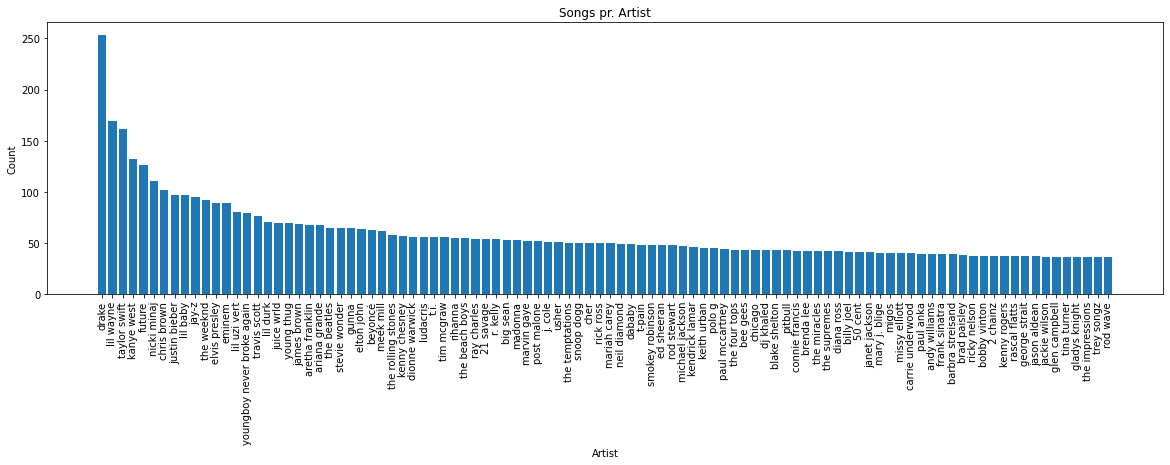

In [28]:
sorted_artists = {k: v for k, v in sorted(artist_count.items(), key=lambda item: item[1], reverse=True) if v > 35}
#for k, v in sorted_artists.items():
#    print(k + ':', v)

fig = plt.figure(figsize=(20,5))
plt.bar(*zip(*sorted_artists.items()))
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Songs pr. Artist')
plt.show()

plotly_fig = tls.mpl_to_plotly(fig, resize=True)
plotly_fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(np.arange(len(sorted_artists.keys()))),
        ticktext = list(sorted_artists.keys()))
)
plotly.write_image(plotly_fig, plotly_folder + "songs_per_artist.json")
iplot(plotly_fig)



In [31]:
plotly.write_html(plotly_fig, file=plotly_folder + "songs_per_artist.html", auto_open=False)